In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Display the first few rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results to a DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.36198848, 0.1920749 ])

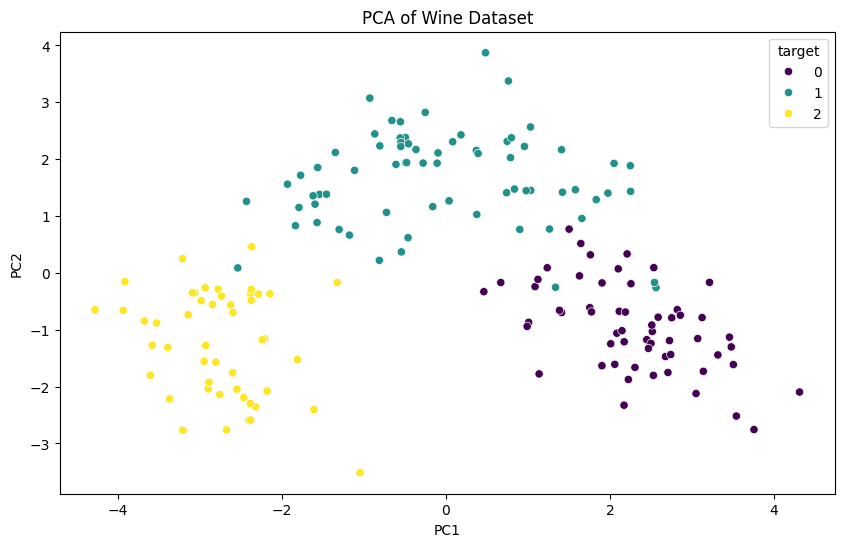

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='viridis')
plt.title('PCA of Wine Dataset')
plt.show()


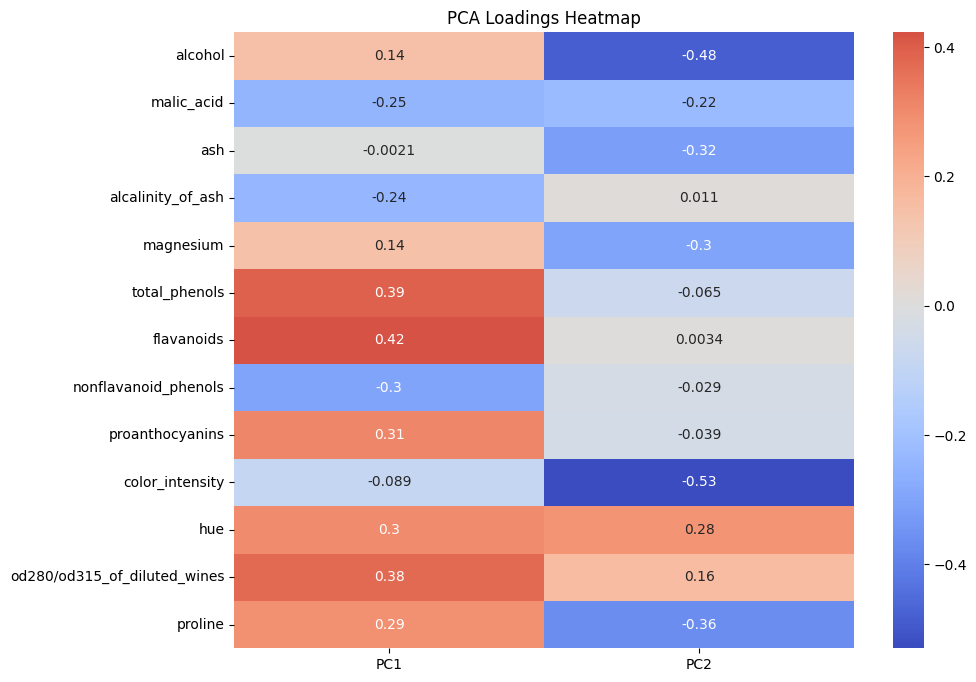

In [5]:
# Plot heatmap of PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=wine_data.feature_names)

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings Heatmap')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy_without_pca = accuracy_score(y_test, y_pred)
f1_without_pca = f1_score(y_test, y_pred, average='weighted')
accuracy_without_pca, f1_without_pca


(1.0, 1.0)

In [7]:
# Split the PCA-transformed dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a RandomForest classifier on PCA-transformed data
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_pca)

# Predict and evaluate
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test_pca, y_pred_pca)
f1_with_pca = f1_score(y_test_pca, y_pred_pca, average='weighted')
accuracy_with_pca, f1_with_pca


(0.9814814814814815, 0.9814465628419116)

In [8]:
print(f"Accuracy without PCA: {accuracy_without_pca:.4f}")
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")
print(f"F1 without PCA: {f1_without_pca:.4f}")
print(f"F1 with PCA: {f1_with_pca:.4f}")

Accuracy without PCA: 1.0000
Accuracy with PCA: 0.9815
F1 without PCA: 1.0000
F1 with PCA: 0.9814
